# Clustering
A small notebook for doing some data exploration and clustering on some dummy data to check the implementation of our functions work as expected.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from kmeans import KMeans
from dbscan import dbscan
from helpers import calculate_average_radius, scatter, davies_bouldin_score, pca

# Plot some sample data
Lets just test our algorithms on some simple 2D data to make sure they behave as expected

/zhome/c9/c/156514/wiki-suggest/text-processing/helpers.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(points[:,0], points[:,1], c=colors, cmap="Set1")


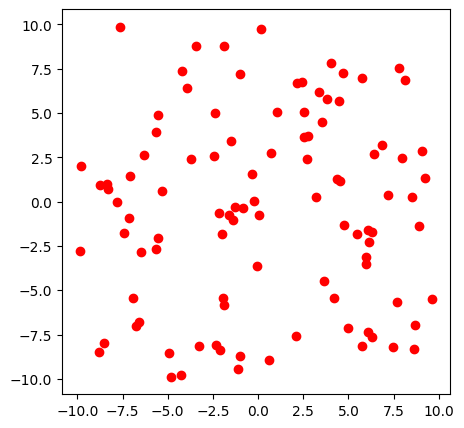

In [2]:
N = 100
points = np.random.uniform(-10, 10, (N, 2))

scatter(points)

### Select K based on average radius

In [3]:
K = 25

radius_scores = []
davies_scores = []

for k in trange(2, K + 1):
    kmeans = KMeans(n_clusters = k, n_iterations = 10)
    labels, centroids = kmeans.cluster(points)
    
    # We return the mean of the average radius per cluster - maybe it should be a mean or something else idk
    radius_scores.append(calculate_average_radius(points, labels, centroids).mean())
    davies_scores.append(davies_bouldin_score(points, labels, centroids))


100%|██████████| 24/24 [00:00<00:00, 35.83it/s]


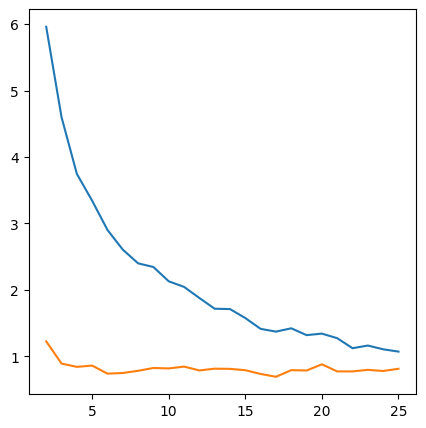

In [4]:
# Note davies-score sucks, or at least doesnt changes the the number of clusters
plt.figure(figsize=(5,5))
plt.plot(range(2, K + 1), radius_scores)
plt.plot(range(2, K + 1), davies_scores)
plt.show()

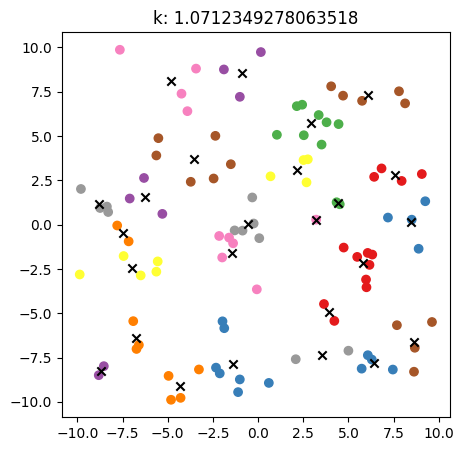

In [5]:
# Plot the last clustering for fun
scatter(points, centroids, labels, f"k: {radius_scores[-1]}")    

### K-means algorithm

In [6]:
N_CLUSTERS = 10
kmeans = KMeans(n_clusters = N_CLUSTERS, n_iterations = 10)
labels, centroids = kmeans.cluster(points)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


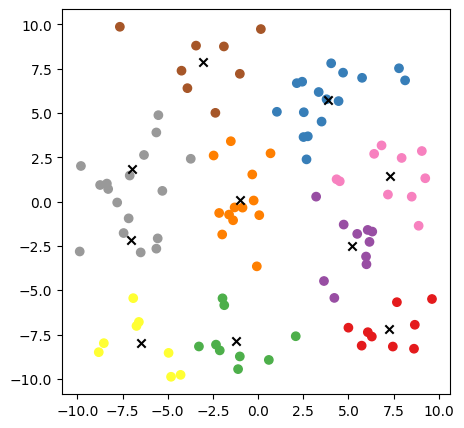

In [7]:
print(set(labels))
scatter(points, centroids=centroids,colors=labels)

### DBSCAN algorithm

In [8]:
labels = dbscan(points.tolist(), eps = 2, min_neighbours = 3, dist_function = "eucliean")

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}


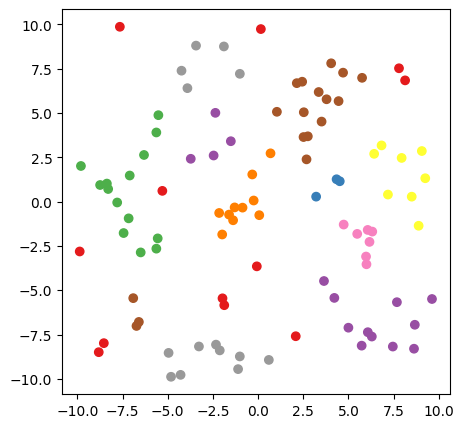

In [9]:
print(set(labels))
scatter(points, colors=labels)

# Using our data
Using the feature vectors of tf-idf or s-bert are high dimensional and not as easily visualized. Buts lets do some exploratory analysis

In [2]:
X_tfidf = np.loadtxt("/work3/s204163/wiki/tfidffeatures.csv", delimiter=",")
X_sbert = np.loadtxt("/work3/s204163/wiki/sbertfeatures.csv", delimiter=",")

print(X_tfidf.shape)
print(X_sbert.shape)

(36029, 200)
(36029, 384)


In [29]:
K = 50

from sklearn.cluster import KMeans

radius_scores = []
davies_scores = []

for k in trange(2, K + 1):
    labels, centroids = KMeans(n_clusters = k).cluster(X_tfidf)
    
    # We return the mean of the average radius per cluster - maybe it should be a mean or something else idk
    radius_scores.append(calculate_average_radius(X_tfidf, labels, centroids).mean())
    davies_scores.append(davies_bouldin_score(X_tfidf, labels, centroids))


100%|██████████| 49/49 [01:36<00:00,  1.98s/it]


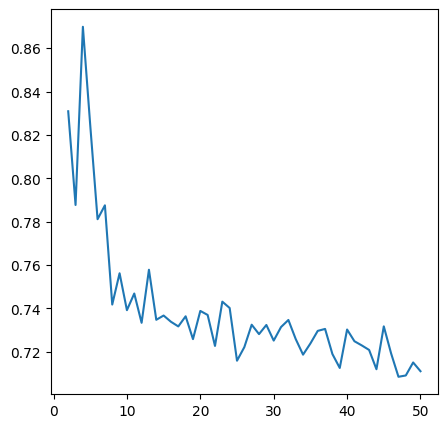

In [30]:
plt.figure(figsize=(5,5))
plt.plot(range(2, K + 1), radius_scores)
plt.show()

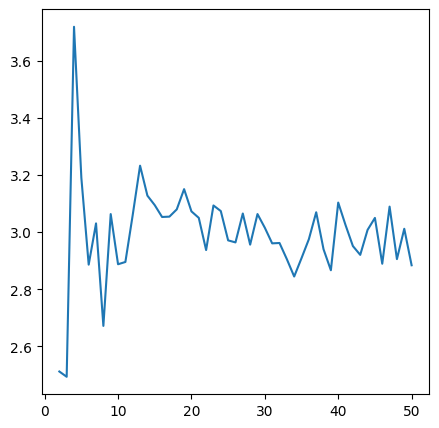

In [31]:
plt.figure(figsize=(5,5))
plt.plot(range(2, K + 1), davies_scores)
plt.show()

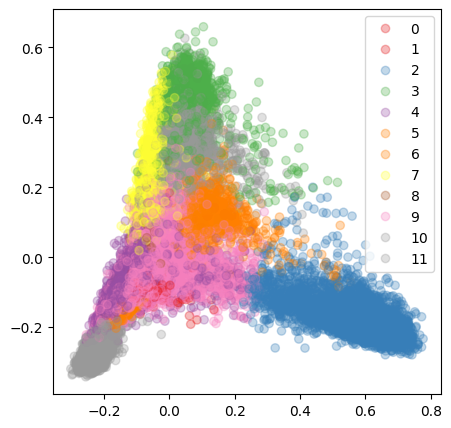

In [14]:
N_CLUSTERS = 12
labels, centroids = KMeans(n_clusters = N_CLUSTERS).cluster(X_tfidf)
pca(X_tfidf, labels=labels)

In [19]:
from sklearn.cluster import KMeans # TODO: Remove, just for speed in testing
N_CLUSTERS = 12
# labels, centroids = KMeans(n_clusters = N_CLUSTERS).cluster(X_sbert)
kmeans = KMeans(n_clusters = N_CLUSTERS, n_init = "auto").fit(X_sbert)
labels = kmeans.labels_
pca(X_sbert, labels=labels)

TypeError: 'PCA' object is not callable

In [23]:
longest_dist = 0
longest_pair = None
total_dist = 0.0

for i in trange(X_sbert.shape[0]):
    dists = np.linalg.norm(X_sbert - X_sbert[i,:], axis=1)
    dist = np.max(dists)
    total_dist += np.sum(dists)

    if longest_dist < dist:
        longest_dist = dist
        longest_pair = (i, np.argmax(dists))

100%|██████████| 36029/36029 [1:03:28<00:00,  9.46it/s]


In [27]:
print(longest_dist) # 1.447095379214053
print(longest_pair) # (36028, 34789)
print(total_dist)   # 1557499742.6663265

1.447095379214053
(36028, 34789)
1557499742.6663265


In [1]:
average_dist = 1557499742.6663265 / (36028 * 36028)

1.1999072445478691

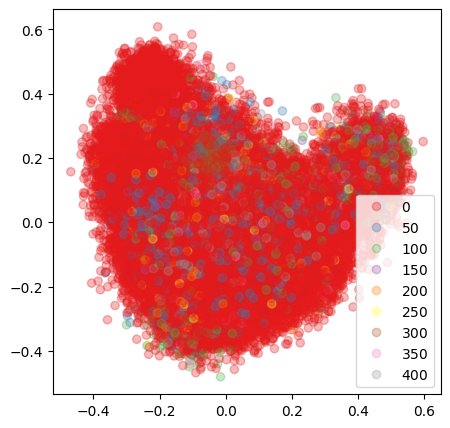

In [12]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.85, min_samples=4).fit(X_sbert)
labels = clustering.labels_
pca(X_sbert, labels=labels)

pca done
tsne done


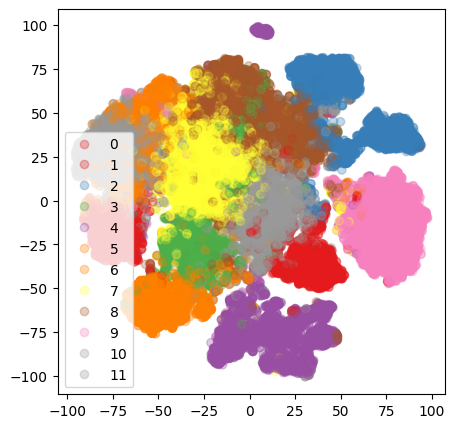

In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X = X_sbert

# PCA
pca = PCA(n_components = 10)
X_pca = pca.fit(X).transform(X) if type(X) == np.ndarray else pca.fit(X.toarray()).transform(X.toarray())
print("pca done")

# TSNE
X_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X_pca)
print("tsne done")

plt.figure(figsize = (5,5))
x, y = X_tsne.T
labels = labels if type(labels) == list else labels.tolist()
scatter = plt.scatter(x, y, c = labels, cmap="Set1", label = labels, alpha=0.3)
plt.legend(*scatter.legend_elements())
plt.show()

In [22]:
pca = PCA()
X_pca = pca.fit(X).transform(X) if type(X) == np.ndarray else pca.fit(X.toarray()).transform(X.toarray())

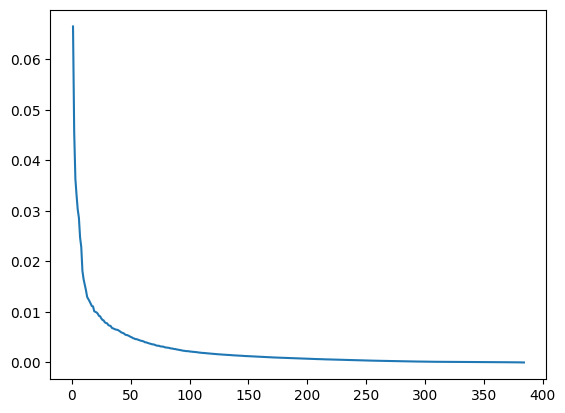

In [24]:
plt.plot(range(1, 1+len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()